  Site_Number  Year Inventory_Direction Compass_Direction Count_Date  \
0         B02  2023                 All               All 2023-05-14   
1         B02  2023                 All               All 2023-05-14   
2         B02  2023                 All               All 2023-08-13   
3         B02  2023                 All               All 2023-08-13   
4         B02  2023                 All               All 2023-07-05   

  Day_of_Week  Hour  Volume_Rank  Increasing_Direction_Volume  \
0      Sunday  1100            1                       1349.0   
1      Sunday  1200            2                       1440.0   
2      Sunday  1300            3                       1741.0   
3      Sunday  1200            4                       1714.0   
4   Wednesday  1300            5                       1832.0   

   Decreasing_Direction_Volume  K_Factor  D_Factor  Single_Unit_Truck_Pct  \
0                       1929.0    0.1414    0.5885                 0.0195   
1                     

<ipython-input-4-f1f13f5e42a5>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series['Increasing_Direction_Volume'] = scaler.fit_transform(time_series[['Increasing_Direction_Volume']])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 24, 32)              │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 24, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,705 (49.63 KB)

 Trainable params: 12,705 (49.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
3495/3495 ━━━━━━━━━━━━━━━━━━━━ 80s 22ms/step - loss: 0.0348 - val_loss: 0.0215
Epoch 2/20
3495/3495 ━━━━━━━━━━━━━━━━━━━━ 80s 21ms/step - loss: 0.0329 - val_loss: 0.0217
Epoch 3/20
3495/3495 ━━━━━━━━━━━━━━━━━━━━ 83s 21ms/step - loss: 0.0332 - val_loss: 0.0216
Epoch 4/20
3495/3495 ━━━━━━━━━━━━━━━━━━━━ 83s 22ms/step - loss: 0.0326 - val_loss: 0.0212
Epoch 5/20
3495/3495 ━━━━━━━━━━━━━━━━━━━━ 80s 21ms/step - loss: 0.0323 - val_loss: 0.0217
Epoch 6/20
3495/3495 ━━━━━━━━━━━━━━━━━━━━ 81s 21ms/step - loss: 0.0328 - val_loss: 0.0210
Epoch 7/20
3495/3495 ━━━━━━━━━━━━━━━━━━━━ 84s 22ms/step - loss: 0.0326 - val_loss: 0.0213
Epoch 8/20
3495/3495 ━━━━━━━━━━━━━━━━━━━━ 79s 21ms/step - loss: 0.0325 - val_loss: 0.0225
Epoch 9/20
3495/3495 ━━━━━━━━━━━━━━━━━━━━ 73s 21ms/step - loss: 0.0317 - val_loss: 0.0214
Epoch 10/20
3495/3495 ━━━━━━━━━━━━━━━━━━━━ 84s 21ms/step - loss: 0.0319 - val_loss: 0.0212
Epoch 11/20
3495/3495 ━━━━━━━━━━━━━━━━━━━━ 80s 21ms/step - loss: 0.0321 - val_loss: 0.0210
Epoch 12

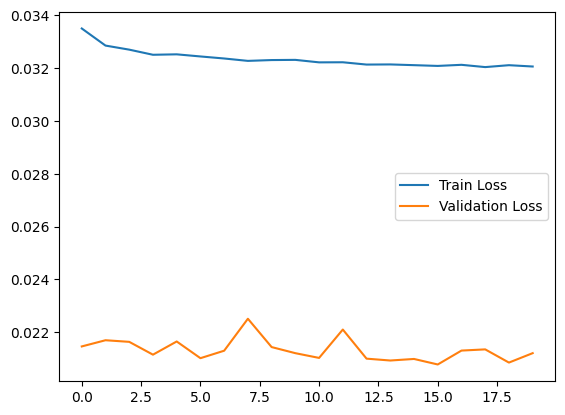

1748/1748 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step
749/749 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
Trained RMSE: 1377.7559
Test RMSE: 1377.7559


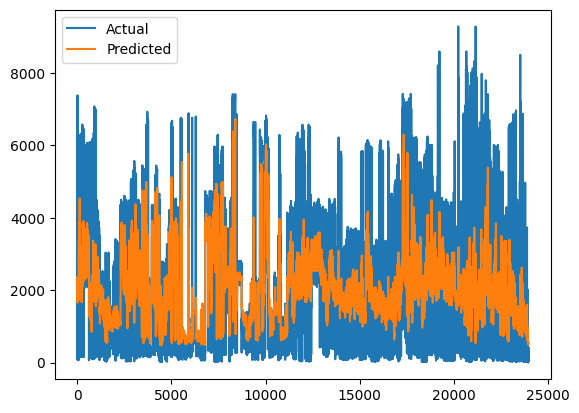

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Code Reference on LSTM Python Workflow: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
#Define LSTM parameters
features = 1
timesteps = 24
hidden_dim = 32
output_dim = 1
num_epochs = 20
batch_size = 16

#Load Dataset
file_path = "Design-Hour-Report-2023.xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="Top 200 Hours by Site", skiprows=3)

#Rename columns properly based on actual data
df.columns = [
    "Site_Number", "Year", "Inventory_Direction", "Compass_Direction", "Count_Date",
    "Day_of_Week", "Hour", "Volume_Rank", "Increasing_Direction_Volume",
    "Decreasing_Direction_Volume", "K_Factor", "D_Factor", "Single_Unit_Truck_Pct",
    "Combination_Truck_Pct"
]

#Remove rows with NA values in key columns (Hour and Volume)
df = df.dropna(subset=["Hour", "Increasing_Direction_Volume", "Decreasing_Direction_Volume"])

#Convert Hour to Numeric
df["Hour"] = pd.to_numeric(df["Hour"], errors="coerce").astype("Int64")

#Convert Count_Date to datetime format
df["Count_Date"] = pd.to_datetime(df["Count_Date"], errors="coerce")

#Check cleaned dataset
print(df.head())

#Convert the timestamp column to datetime format
df["Count_Date"] = pd.to_datetime(df['Hour'], errors="coerce")

df = df.sort_values(by="Count_Date")

time_series = df[['Hour', 'Increasing_Direction_Volume']]

#Normalise Traffic Volume
scaler = MinMaxScaler()
time_series['Increasing_Direction_Volume'] = scaler.fit_transform(time_series[['Increasing_Direction_Volume']])

#Convert to supervised learning format, return arrays for x and y
def create_sequences(data, seq_length):
  X, y = [], []
  for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])
  return np.array(X), np.array(y)

seq_length = timesteps
traffic_data = time_series['Increasing_Direction_Volume'].values
X, y = create_sequences(traffic_data, seq_length)

#Split data into training and testing sets (70/30 split)
tr = int(len(X) * 0.7)
X_train, X_test = X[:tr], X[tr:]
y_train, y_test = y[:tr], y[tr:]

#Reshape input for LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], features))

#Build LSTM model
model = Sequential([
    LSTM(hidden_dim, activation = 'relu', return_sequences=True, input_shape=(timesteps, features)),

    Dropout(0.2),

    LSTM(hidden_dim, activation='relu'),

    Dropout(0.2),

    Dense(output_dim)
])

#Compile the model with the Adam optimiser and MSE loss function
model.compile(optimizer='adam', loss= 'mean_squared_error')

#Show model summary to check the architecture
model.summary()

#Train model
history = model.fit(X_train, y_train, epochs= num_epochs, batch_size = batch_size, validation_data=(X_test, y_test))

#Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

#Predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#Inverse transform predictions
y_train_pred = scaler.inverse_transform(y_train_pred.reshape(-1,1))
y_test_pred = scaler.inverse_transform(y_test_pred.reshape(-1,1))
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

#Calculate RMSE for trained and test data
rmse_train = np.sqrt(mean_squared_error(y_test, y_test_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Trained RMSE: {rmse_train:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")

#Plot final results on Actual and Predicted
plt.plot(y_test, label='Actual')
plt.plot(y_test_pred, label='Predicted')
plt.legend()
plt.show()